<a href="https://colab.research.google.com/github/subinchang/subinchang/blob/main/ML_day7/7_3_Neural_Networks_with_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Neural Networks with MNIST

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader

import torchvision.datasets as dsets
import torchvision.transforms as transforms

import numpy as np
import random

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Prepare MNIST Data

In [3]:
train_data = dsets.MNIST(root='data/',
                         train=True,
                         transform=transforms.ToTensor(),
                         download=True)

test_data = dsets.MNIST(root='data/',
                        train=False,
                        transform=transforms.ToTensor(),
                        download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [7]:
len(train_data.data) # 60000 train set

60000

In [8]:
len(test_data.data) # 10000 test set

10000

In [9]:
train_data.data.size() # data / label로 분류 되기 때문에 .data가 하나 더 붙은 것

torch.Size([60000, 28, 28])

In [10]:
train_data.data[0,:,:] # numbers in 256 rgb to express one image

tensor([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,  18,
          18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,   0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   

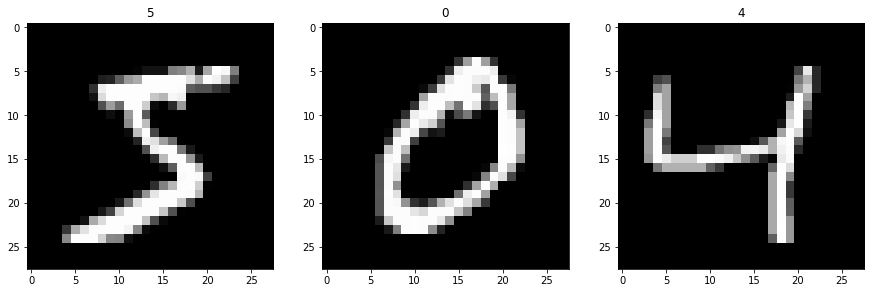

In [4]:
fig = plt.figure(figsize = (15, 5))
ax1 = fig.add_subplot(1, 3, 1)
ax2 = fig.add_subplot(1, 3, 2)
ax3 = fig.add_subplot(1, 3, 3)

ax1.set_title(train_data.targets[0].item())
ax1.imshow(train_data.data[0,:,:].numpy(), cmap='gray')

ax2.set_title(train_data.targets[1].item())
ax2.imshow(train_data.data[1,:,:].numpy(), cmap='gray')

ax3.set_title(train_data.targets[2].item())
ax3.imshow(train_data.data[2,:,:].numpy(), cmap='gray')

## 2. Make Batch Loader

In [5]:
batch_size = 100

train_loader  = DataLoader(dataset=train_data,
                           batch_size=batch_size,
                           shuffle=True)

# divide 60000 into groups of 100, 600 batches

In [11]:
batch_images, batch_labels = iter(train_loader).next()
print(batch_labels.numpy(), ", ", len(batch_labels.numpy()))

AttributeError: ignored

## 3. Define Model

In [12]:
model = nn.Sequential(
    nn.Linear(784, 512),
    nn.ReLU(),
    nn.Linear(512, 10)
) # 512 -> relu -> final (without the relu, it's just many linears which results in a linear)

In [13]:
loss = nn.CrossEntropyLoss() # cross entropy because it's a classification problem

In [14]:
optimizer = optim.SGD(model.parameters(), lr=0.001)

## 4 Train Model

In [15]:
num_epochs = 5

In [16]:
for epoch in range(num_epochs):
    
    total_batch = len(train_data) // batch_size
    
    for i, (batch_images, batch_labels) in enumerate(train_loader):
        
        X = batch_images.view(-1, 28 * 28)
        Y = batch_labels
        
        pre = model(X)
        cost = loss(pre, Y)
        
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()
        
        if (i+1) % 300 == 0:
            print('Epoch [%d/%d], lter [%d/%d], Loss: %.4f'
                 %(epoch+1, num_epochs, i+1, total_batch, cost.item()))
    
print("Learning Finished!")

# epoch: 순전파+역전파
# iter: how many times you repeat in one epoch

Epoch [1/5], lter [300/600], Loss: 2.2375
Epoch [1/5], lter [600/600], Loss: 2.1511
Epoch [2/5], lter [300/600], Loss: 2.0792
Epoch [2/5], lter [600/600], Loss: 1.9947
Epoch [3/5], lter [300/600], Loss: 1.9068
Epoch [3/5], lter [600/600], Loss: 1.7859
Epoch [4/5], lter [300/600], Loss: 1.7440
Epoch [4/5], lter [600/600], Loss: 1.6214
Epoch [5/5], lter [300/600], Loss: 1.5245
Epoch [5/5], lter [600/600], Loss: 1.3563
Learning Finished!


## 5. Test Model

In [21]:
correct = 0
total = 0

for images, labels in test_data:
    
    images  = images.view(-1, 28 * 28)
    outputs = model(images)
    
    _, predicted = torch.max(outputs.data, 1)
    
    total += 1
    correct += (predicted == labels).sum()
    
print('Accuracy of test images: %.4f %%' % (100 * float(correct) / total))

Accuracy of test images: 78.0000 %


In [18]:
r = random.randint(0, len(test_data)-1)
X_single_data = test_data.data[r:r + 1].view(-1,28*28).float()
Y_single_data = test_data.targets[r:r + 1]

In [22]:
X_single_data # a random single data

tensor([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 105.,
         254., 107.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0., 174., 253., 233.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
           0.,   0.,   0.,  

In [23]:
Y_single_data # show correct label

tensor([6])

Label :  [6]
Prediction :  [0]


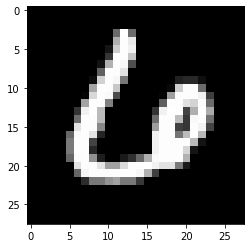

In [19]:
# single prediction result
single_pre = model(X_single_data)
plt.imshow(X_single_data.data.view(28,28).numpy(), cmap='gray')

print('Label : ', Y_single_data.data.view(1).numpy())
print('Prediction : ', torch.max(single_pre.data, 1)[1].numpy())